<h1><center>Stratified Sampling</h1>

In [72]:
import pandas as pd

df = pd.read_csv('/Users/kunu/Desktop/Lab Work/ML LAB WORK/1. Dataset Download/diabetes.csv')
df.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
178,5,143,78,0,0,45.0,0.190,47,0
108,3,83,58,31,18,34.3,0.336,25,0
363,4,146,78,0,0,38.5,0.520,67,1
78,0,131,0,0,0,43.2,0.270,26,1
25,10,125,70,26,115,31.1,0.205,41,1
702,1,168,88,29,0,35.0,0.905,52,1
210,2,81,60,22,0,27.7,0.290,25,0
759,6,190,92,0,0,35.5,0.278,66,1
267,2,128,64,42,0,40.0,1.101,24,0
507,1,130,60,23,170,28.6,0.692,21,0


No. of negative reports:  500
No. of positive reports:  268
The data is imbalanced


Text(0.5, 1.0, 'Imbalanced data')

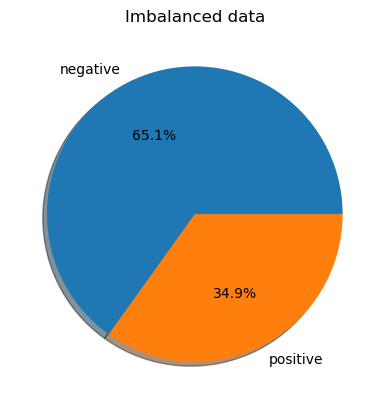

In [73]:
neg,pos = df['Outcome'].value_counts()
print("No. of negative reports: ",neg)
print("No. of positive reports: ",pos)
if neg!=pos:
    print("The data is imbalanced")
else:
    print("The data is balanced")

from matplotlib import pyplot as plt

plt.pie(x=[neg,pos],labels=['negative','positive'],shadow=True,autopct='%1.1f%%')
plt.title("Imbalanced data")

/var/folders/32/dhq7gf0n5yq0162cwcsynrtm0000gn/T/ipykernel_2610/240394829.py:13: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


Text(0.5, 1.0, 'Testing Set')

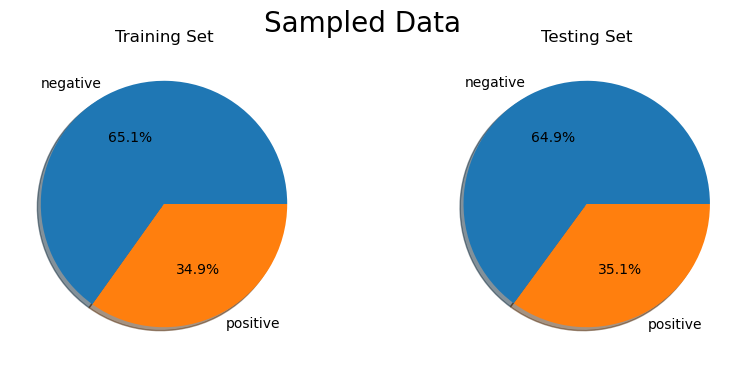

In [74]:

x = df.iloc[:,:9]
y = df.iloc[:,-1]

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=123456789,stratify=y,shuffle=True)

neg_train,pos_train = y_train.value_counts()
neg_test,pos_test = y_test.value_counts()

plt.subplots(figsize=(10,4))
plt.suptitle("Sampled Data",size=20)
plt.subplot(1,2,1)
plt.pie(x=[neg_train,pos_train],labels=['negative','positive'],shadow=True,autopct='%1.1f%%')
plt.title("Training Set")

plt.subplot(1,2,2)
plt.pie(x=[neg_test,pos_test],labels=['negative','positive'],shadow=True,autopct='%1.1f%%')
plt.title("Testing Set")

<h1><center>Stratified K Fold</h1>

Fold 1
the percentage of negative in training set: 65.10416666666666
the percentage of positive in training set: 34.89583333333333
the percentage of negative in testing set: 65.10416666666666
the percentage of positive in testing set: 34.89583333333333
Fold 2
the percentage of negative in training set: 65.10416666666666
the percentage of positive in training set: 34.89583333333333
the percentage of negative in testing set: 65.10416666666666
the percentage of positive in testing set: 34.89583333333333


/var/folders/32/dhq7gf0n5yq0162cwcsynrtm0000gn/T/ipykernel_2610/3774871353.py:24: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)
/var/folders/32/dhq7gf0n5yq0162cwcsynrtm0000gn/T/ipykernel_2610/3774871353.py:24: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


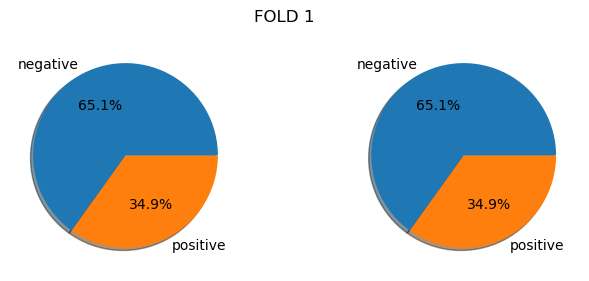

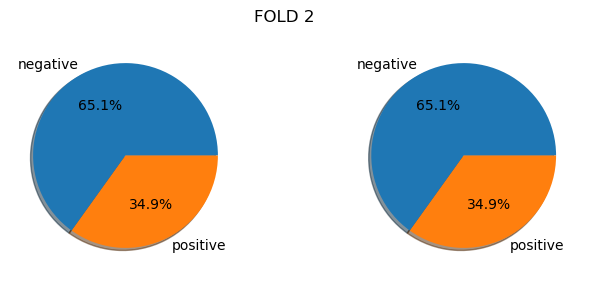

In [75]:
from sklearn.model_selection import train_test_split, StratifiedKFold

x = df.iloc[:,:9]
y = df.iloc[:,-1]
sfk = StratifiedKFold(n_splits=2,random_state=123456789,shuffle=True)
i=1
for train_index,test_index in sfk.split(x,y):

    print(f"Fold {i}")

    train_y = y[train_index]
    test_y = y[test_index]

    neg_train,pos_train = train_y.value_counts()
    neg_test,pos_test = test_y.value_counts()

    print(f'the percentage of negative in training set: {neg_train/(neg_train+pos_train)*100}')
    print(f'the percentage of positive in training set: {pos_train/(neg_train+pos_train)*100}')
    print(f'the percentage of negative in testing set: {neg_test/(neg_test+pos_test)*100}')
    print(f'the percentage of positive in testing set: {pos_test/(neg_test+pos_test)*100}')

    plt.subplots(figsize=(8,3))
    plt.suptitle(f'FOLD {i}')
    plt.subplot(1,2,1)
    plt.pie(x=[neg_train,pos_train],labels=['negative','positive'],shadow=True,autopct='%1.1f%%')

    plt.subplot(1,2,2)
    plt.pie(x=[neg_test,pos_test],labels=['negative','positive'],shadow=True,autopct='%1.1f%%')

    i+=1

